In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
# ignore warnings
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
os.chdir('D:\AI1606\Ky_5\AIL302m\Kaggle\Data')

In [3]:
train_df = pd.read_csv('train.csv',delimiter=';')
test_df = pd.read_csv('test.csv',delimiter=';')
id_test = test_df['id']
test_df.drop('id', axis=1, inplace=True)

In [4]:
target = 'quality'
train_df[target] = train_df[target].apply(lambda x: str(x))

In [5]:
train_df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
4277,6.3,0.2,0.42,2.8,0.032,33,83,0.9908,3.30,0.42,11.6,6,white
4672,7.1,0.4,0.37,4.8,0.019,39,114,0.9904,3.08,0.49,12.7,7,white
1787,7.4,0.2,0.27,1.3,0.048,26,105,0.9940,3.52,0.66,10.6,6,white
6185,5.4,0.3,0.30,1.2,0.029,25,93,0.9874,3.31,0.40,13.6,7,white
4103,7.4,0.3,0.49,8.2,0.055,49,188,0.9974,3.52,0.58,9.7,6,white


In [6]:
test_df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
745,6.2,0.27,0.43,7.8,0.056,48.0,244.0,0.99560,3.10,0.51,9.0,white
259,6.4,0.15,0.29,1.8,0.044,21.0,115.0,0.99166,3.10,0.38,10.2,white
762,10.5,0.59,0.49,2.1,0.070,14.0,47.0,0.99910,3.30,0.56,9.6,red
60,10.6,0.48,0.64,2.2,0.111,6.0,20.0,0.99700,3.26,0.66,11.7,red
636,10.4,0.24,0.49,1.8,0.075,6.0,20.0,0.99770,3.18,1.06,11.0,red


In [7]:
# Concatenate train and test data
train_df['source']='train'
test_df['source']='test'
test_df['quality'] = 'None'
data = pd.concat([train_df, test_df], ignore_index=True)

In [8]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,source
0,6.6,0.3,0.36,1.2,0.035,43.0,126.0,0.9909,3.01,0.63,11.4,6,white,train
1,7.7,0.5,0.26,1.9,0.062,9.0,31.0,0.9966,3.39,0.64,9.6,5,red,train
2,8.4,0.5,0.35,2.9,0.076,21.0,127.0,0.9976,3.23,0.63,9.2,5,red,train
3,7.5,0.4,0.33,5.0,0.045,30.0,131.0,0.9942,3.32,0.44,10.9,6,white,train
4,6.4,0.2,0.25,20.2,0.083,35.0,157.0,0.9998,3.17,0.50,9.1,5,white,train


In [9]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type', 'source'],
      dtype='object')

In [10]:
category_columns = [col for col in data.columns if data[col].dtype == 'object']
numeric_columns = [col for col in data.columns if data[col].dtype != 'object']

In [11]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,7534.000000,7534.000000,7534.000000,7534.000000,7534.000000,7534.00000,7534.000000,7534.000000,7534.000000,7534.000000,7534.000000
mean,7.252588,0.348880,0.317876,5.366120,0.057495,30.16837,114.270972,0.994785,3.221034,0.536325,10.463065
std,1.329578,0.169371,0.148738,4.719864,0.037824,17.67233,56.878089,0.003004,0.160407,0.156943,1.189838
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.00000,6.000000,0.987100,2.720000,0.220000,8.000000
25%,6.400000,0.200000,0.240000,1.800000,0.038000,16.00000,73.250000,0.992400,3.110000,0.430000,9.500000
50%,7.000000,0.300000,0.310000,2.900000,0.048000,28.00000,117.000000,0.995100,3.210000,0.510000,10.200000
75%,7.700000,0.400000,0.400000,8.000000,0.068000,41.00000,155.000000,0.997035,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.00000,440.000000,1.039000,4.010000,2.000000,14.900000


In [12]:
data.describe(include=['object'])

,quality,type,source
count,7534,7534,7534
unique,8,2,2
top,6,white,train
freq,2809,5520,6714


# EDA

## Check missing value

In [13]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
source                  0
dtype: int64

## Check outlier

In [14]:
def check_outlier_data(data,numeric_columns):
    dict_oulier = {}
    for col in numeric_columns:
        q1,q2,q3 = np.quantile(data[col],[0.25,0.5,0.75])
        iqr = q3 - q1
        lower_bound = q1 - 1.5*iqr
        upper_bound = q3 + 1.5*iqr
        index_outlier = data[(data[col] <lower_bound) | (data[col] > upper_bound)].index
        dict_oulier[col] = {"index":index_outlier,"lower_bound":lower_bound,"upper_bound":upper_bound}
    return dict_oulier

def delete_outlier(data,dict_outlier):
    set_outlier = []
    for col in dict_outlier.keys():
        set_outlier = set_outlier + dict_outlier[col]['index'].values.tolist()
    set_outlier = set_outlier
    data.drop(set_outlier,inplace=True)
    return data

In [15]:
# dict_outlier = check_outlier_data(data,numeric_columns)
# data_outlier = delete_outlier(data.copy(),dict_outlier)

In [16]:
def plot_outlier_data(data,numeric_columns):
    for col in numeric_columns:
        fig,ax = plt.subplots(1,2,figsize=(15,5))
        sns.boxplot(data[col],ax=ax[0],color='red')
        sns.boxplot(data_outlier[col],ax=ax[1],color = 'blue')
        ax[0].set_title(f'Before delete outlier {col}')
        ax[1].set_title(f'After delete outlier {col}')
        plt.show()

In [17]:
# plot_outlier_data(data,numeric_columns)

In [18]:
# data = data_outlier.copy()

## Check Skew

In [19]:
data.skew()

fixed acidity           1.742740
volatile acidity        1.386443
citric acid             0.442985
residual sugar          1.446139
chlorides               5.596749
free sulfur dioxide     1.152369
total sulfur dioxide    0.027761
density                 0.390855
pH                      0.385746
sulphates               2.046787
alcohol                 0.603114
dtype: float64

## Check Imbalance data

In [20]:
data['quality'].value_counts()

6       2809
5       2365
7       1062
None     820
4        230
8        212
3         23
9         13
Name: quality, dtype: int64

<AxesSubplot: >

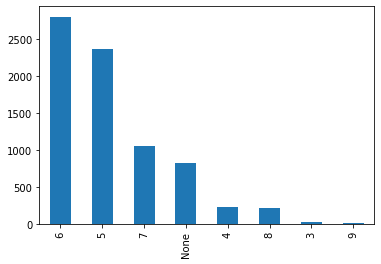

In [21]:
data['quality'].value_counts().plot(kind='bar')

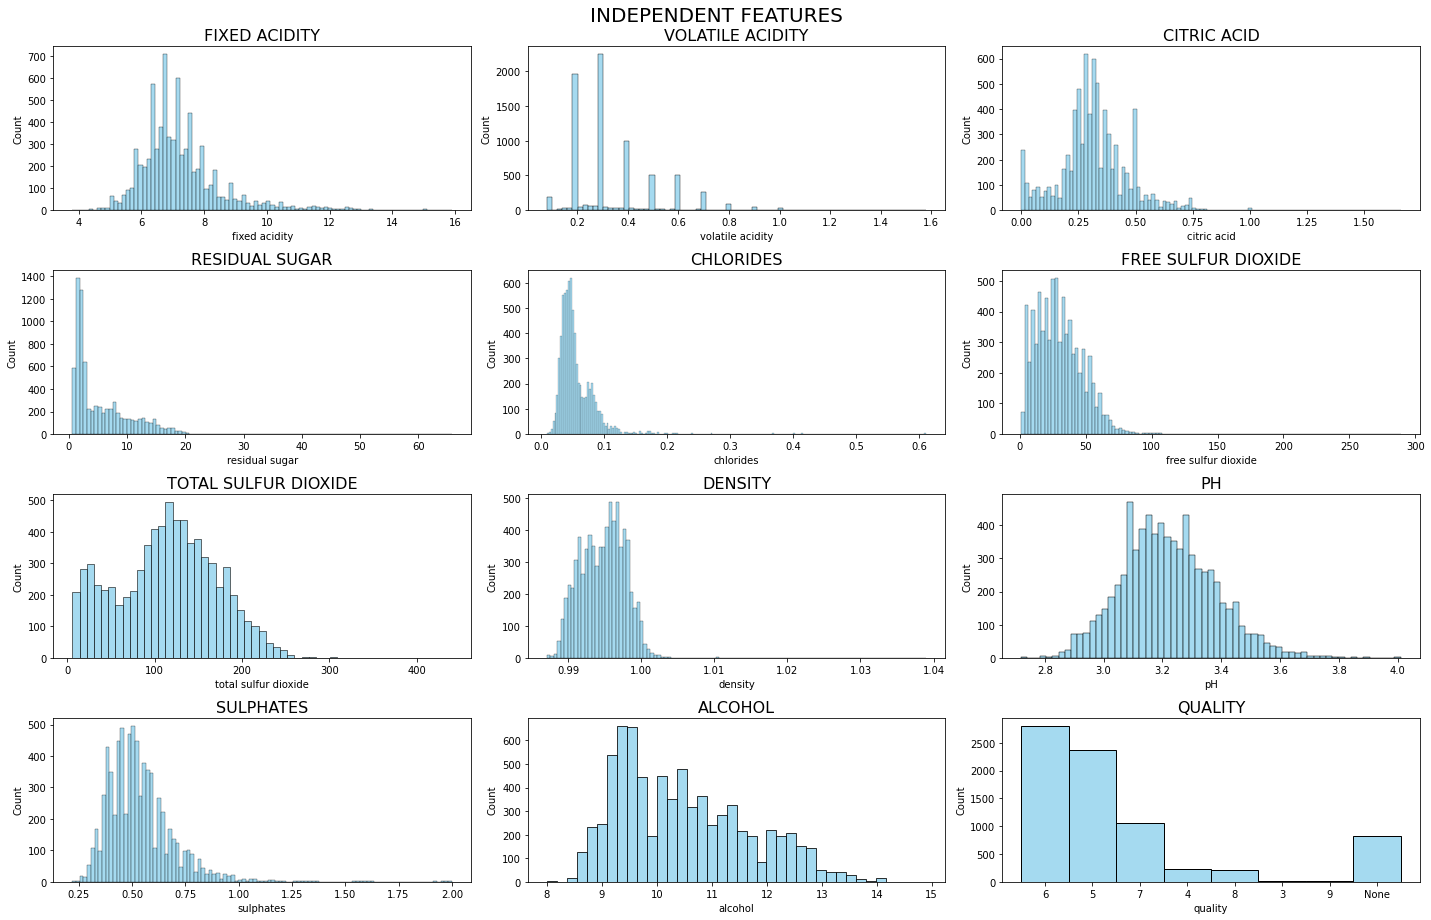

In [22]:
# Checking the distribution of values in the feature variables

fig, axes = plt.subplots(4, 3, figsize=(20,13))
fig.suptitle('Independent Features'.upper(), fontsize=20)
feat = data.columns
f = 0
for i in range(4):
    for j in range(3):
        sns.histplot(data = data,x= feat[f],ax=axes[i,j],color="skyblue")
        axes[i,j].set_title(feat[f].upper(),fontsize=16)
        f += 1
fig.tight_layout()

# Feature Engineering

## StandardScaler normalize

In [23]:
from sklearn.preprocessing import StandardScaler
normal = StandardScaler()
for col in numeric_columns:
    data[col] = normal.fit_transform(data[[col]])
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,source
0,-0.490856,-0.288618,0.283226,-0.882737,-0.594778,0.726134,0.206227,-1.293281,-1.315699,0.596916,0.787500,6,white,train
1,0.336529,0.892297,-0.389141,-0.734417,0.119111,-1.197905,-1.464123,0.604317,1.053425,0.660638,-0.725412,5,red,train
2,0.863047,0.892297,0.215989,-0.522533,0.489276,-0.518832,0.223810,0.937229,0.055899,0.596916,-1.061615,5,red,train
3,0.186095,0.301839,0.081516,-0.077575,-0.330374,-0.009528,0.294140,-0.194671,0.617007,-0.613798,0.367247,6,white,train
4,-0.641290,-0.879076,-0.456378,3.143070,0.674358,0.273419,0.751289,1.669636,-0.318173,-0.231467,-1.145665,5,white,train


## Label encoder

In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
feature = 'type'
data[feature] = le.fit_transform(data[[feature]])

In [25]:
X = data[data['source'] == 'train'].drop(columns=[target,'source'],axis=1)
y = data[data['source'] == 'train'][target].apply(lambda x: int(x))

In [26]:
X.columns,y

(Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
        'pH', 'sulphates', 'alcohol', 'type'],
       dtype='object'),
 0       6
 1       5
 2       5
 3       6
 4       5
        ..
 6709    5
 6710    8
 6711    7
 6712    5
 6713    5
 Name: quality, Length: 6714, dtype: int64)

# Processing Imbalance data using SMOTE

In [27]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(3, 2809), (4, 2809), (5, 2809), (6, 2809), (7, 2809), (8, 2809), (9, 2809)]


# Build Model

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [29]:
model_dict = {'LogisticRegression' : LogisticRegression(),'ExtraTreesClassifier':ExtraTreesClassifier(),'RandomForestClassifier':RandomForestClassifier(),'SVC':SVC()}
model_dict

{'LogisticRegression': LogisticRegression(),
 'ExtraTreesClassifier': ExtraTreesClassifier(),
 'RandomForestClassifier': RandomForestClassifier(),
 'SVC': SVC()}

In [30]:
def classifier(X = X_resampled,y = y_resampled,model_dict = model_dict,random_state = 123,test_size = 0.3):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_size,random_state=random_state)
    result = {}
    for name,model in model_dict.items():
        model.fit(X_train.values,y_train.values)
        y_pred = model.predict(X_test.values)
        result[name] = accuracy_score(y_pred=y_pred,y_true=y_test.values)
    return result

In [31]:
# from tqdm.auto import tqdm
# # get random state
# random_state_list = random.sample(range(1,100),5)
# avg_acc_score = {}
# for rand_st in tqdm(random_state_list):
#     result = classifier(random_state = rand_st)
#     for name,acc in result.items():
#         if name not in avg_acc_score:
#             avg_acc_score[name] = [acc]
#         else:
#             avg_acc_score[name].append(acc)    
# for model,result in avg_acc_score.items():
#     print(f"Model: {model} - Avg Accuracy Score: {np.mean(result)}")
    

In [32]:
# Get ExtraTreesClassifier model to grid search
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
params = {"n_estimators": [16,32,64,128,256,512,1024],
          "max_depth" : [2,4,8,16,32,None],
          }
best_model = ExtraTreesClassifier()
param_search = GridSearchCV(best_model,params,cv = 3)
param_search.fit(X_resampled.values,y_resampled.values)

GridSearchCV(cv=3, estimator=ExtraTreesClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [16, 32, 64, 128, 256, 512, 1024]})

In [34]:
#get best parameter
best_para=param_search.best_params_


In [35]:
from sklearn.model_selection import cross_val_score
# build model with best params
best_model = ExtraTreesClassifier(**best_para)
acc = np.mean(cross_val_score(best_model,X_resampled.values,y_resampled.values,cv=3))

In [36]:
print(f"Accuracy score: {acc}")

Accuracy score: 0.899914303056514


In [37]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=198)
best_model.fit(X_train.values,y_train.values)
confusionMatrix = confusion_matrix(y_test,best_model.predict(X_test.values))

In [38]:
confusionMatrix

array([[862,   0,   0,   0,   0,   0,   0],
       [  5, 847,  16,   8,   1,   0,   0],
       [  3,  47, 658, 125,  14,   2,   0],
       [  0,  10, 147, 555, 122,   5,   0],
       [  1,   1,   7,  58, 747,   9,   1],
       [  0,   0,   0,   3,  13, 798,   2],
       [  0,   0,   0,   0,   0,   0, 832]], dtype=int64)

# Get result

In [39]:
test_data = pd.read_csv('test.csv',delimiter=';')
id = test_data['id']
test_data.drop('id',axis=1,inplace=True)

In [40]:
test_data['type'] = le.fit_transform(test_data[['type']])

In [41]:
from sklearn.preprocessing import StandardScaler
test_data[numeric_columns] = normal.fit_transform(test_data[numeric_columns])

In [42]:
def export_file(id,y_result,file_path :str):
    result_df = pd.DataFrame({'id':id,'quality':y_result.values.reshape(-1)})
    result_df.to_csv(file_path,index=False)

In [43]:
# Export result to file
final_model = SVC()
final_model.fit(X_resampled.values,y_resampled.values)
y_result = pd.DataFrame(final_model.predict(test_data.values))
export_file(id,y_result,'D:\AI1606\Ky_5\AIL302m\Kaggle\code\submission_ETC.csv')